# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [81]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings

%matplotlib inline

In [82]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [83]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [84]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [85]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [86]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19246631,
            "id": 1,
            "last_updated": 1672350543,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 320109533983,
                    "percent_change_1h": 0.13978468915692,
                    "percent_change_24h": 0.724591653054359,
                    "percent_change_7d": -1.13575925351158,
                    "percentage_change_1h": 0.13978468915692,
                    "percentage_change_24h": 0.724591653054359,
                    "percentage_change_7d": -1.13575925351158,
                    "price": 16625.85,
                    "volume_24h": 16269309908
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19246631,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [87]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120525408,
            "id": 1027,
            "last_updated": 1672350547,
            "max_supply": 120525408,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 144260651244,
                    "percent_change_1h": 0.119743965523742,
                    "percent_change_24h": 0.862895033482931,
                    "percent_change_7d": -1.32699779524331,
                    "percentage_change_1h": 0.119743965523742,
                    "percentage_change_24h": 0.862895033482931,
                    "percentage_change_7d": -1.32699779524331,
                    "price": 1197.24,
                    "volume_24h": 4222552039
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120525408,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [88]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)

16625.85


In [89]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)

1197.24


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [90]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'Current value of BTC is: {btc_value:.2f} with a price of BTC of {btc_price:.2f} and holding of {btc_coins:.2f}')


Current value of BTC is: 19951.02 with a price of BTC of 16625.85 and holding of 1.20


In [91]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'Current value of ETH is: {eth_value:.2f} with a price of BTC of {eth_price:.2f} and holding of {eth_coins:.2f}')


Current value of ETH is: 6345.37 with a price of BTC of 1197.24 and holding of 5.30


In [92]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f' Total value Cryptocurrency wallet is: {total_crypto_wallet:.2f}')


 Total value Cryptocurrency wallet is: 26296.39


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [93]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [94]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [95]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2022-12-27
start_date = pd.Timestamp("2022-12-27",tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-12-27",tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [96]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers, 
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

AGG                                               \
                            open    high      low  close   volume trade_count   
timestamp                                                                       
2022-12-27 05:00:00+00:00  97.46  97.615  97.2121  97.26  7922269       28214   

                                         SPY                                   \
                                vwap    open    high     low  close    volume   
timestamp                                                                       
2022-12-27 05:00:00+00:00  97.353687  382.79  383.15  379.65  381.4  51494435   

                                                  
                          trade_count       vwap  
timestamp                                         
2022-12-27 05:00:00+00:00      427772  381.77669

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [97]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Print the AGG closing price
print(agg_close_price)


97.26


In [98]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
print(spy_close_price)

381.4


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [99]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'Current value bond portfolio: {agg_value:.2f}')


Current value bond portfolio: 19452.00


In [100]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'Current value of stock portfolio: {spy_value:.2f}')


Current value of stock portfolio: 41954.00


In [101]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'Total value of portfolio equals: {total_stocks_bonds:.2f}')


Total value of portfolio equals: 61406.00


In [102]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current savings portfolio
print(f'Total value of portfolio is: {total_portfolio:.2f} comprised of crypto portion: {total_crypto_wallet:.2f} and stock/bond portion: {total_stocks_bonds:.2f}')

Total value of portfolio is: 87702.39 comprised of crypto portion: 26296.39 and stock/bond portion: 61406.00


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [103]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[26296.391999999996, 61406.0]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [104]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, index=["crypto","stock/bond"], columns=['amount'])

# Display the savings_df DataFrame
display(savings_df)


,amount
crypto,26296.392
stock/bond,61406.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'total value of Member portoflio'}, ylabel='amount'>

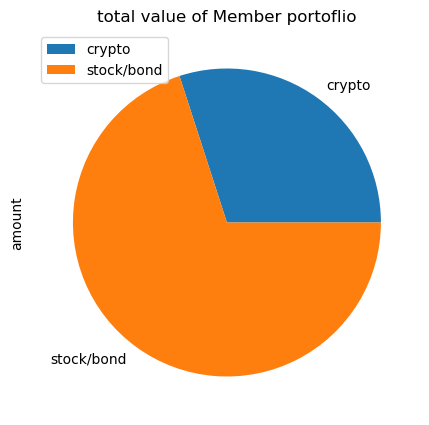

In [105]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount',title='total value of Member portoflio', figsize=(10,5))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [106]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [107]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations, there is enough money in your portfolio to cover your emergency requirement')
elif total_portfolio == emergency_fund_value:
    print('Congratulations, your total portfolio value equals your emergency requirement')
else:
    dollars_to_go = emergency_fund_value - total_portfolio
    print(f'Total Portfolio still has to grow by {dollars_to_go} to match your emergency fund value')

Congratulations, there is enough money in your portfolio to cover your emergency requirement


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [108]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

start_date_mc = pd.Timestamp("2019-12-27",tz="America/New_York").isoformat()
end_date_mc = pd.Timestamp("2022-12-27",tz="America/New_York").isoformat()


In [109]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df_mc = alpaca.get_bars(
    tickers, 
    timeframe,
    start = start_date_mc,
    end = end_date_mc
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df_mc[prices_df_mc['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df_mc[prices_df_mc['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df_mc = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display both the first and last five rows of the DataFrame
display(prices_df_mc.head())
display(prices_df_mc.tail())

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-12-27 05:00:00+00:00  112.60  112.640  112.5800  112.63  4733786   
2019-12-30 05:00:00+00:00  112.42  112.645  112.3400  112.63  3979209   
2019-12-31 05:00:00+00:00  112.54  112.540  112.3650  112.37  6807706   
2020-01-02 05:00:00+00:00  112.68  112.800  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.050  112.7814  113.01  3664283   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-12-27 05:00:00+00:00       10709  112.615001  323.74  323.80  322.28   
2019-12-30 05:00:00+00:00       11922  112.529642  322.95  323.10  320.55   
2019-12-31 05:00:00+00:00       19647  112.410957  320.53  322.13  320.15   
2020-01-02 05:00:00+00:00       17763  112.645004  323.54  324.89  322.53   
2020-01-03 05:00:00+00:00       14453  112.958798  321.16  323.64  321.10   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-12-27 05:00:00+00:00  322.85  43669820      187647  322.997519  
2019-12-30 05:00:00+00:00  321.13  49782805      245064  321.464803  
2019-12-31 05:00:00+00:00  321.85  57173534      212945  321.379997  
2020-01-02 05:00:00+00:00  324.87  59253833      304884  323.710023  
2020-01-03 05:00:00+00:00  322.43  77783121      358500  322.791701

AGG                                     \
                            open     high      low  close    volume   
timestamp                                                             
2022-12-20 05:00:00+00:00  98.10  98.2600  97.9800  98.07  10278374   
2022-12-21 05:00:00+00:00  98.49  98.5360  98.1900  98.34   8370706   
2022-12-22 05:00:00+00:00  98.32  98.4653  98.2150  98.31   8267294   
2022-12-23 05:00:00+00:00  98.05  98.1100  97.8950  97.97   4761697   
2022-12-27 05:00:00+00:00  97.46  97.6150  97.2121  97.26   7922269   

                                                     SPY                    \
                          trade_count       vwap    open      high     low   
timestamp                                                                    
2022-12-20 05:00:00+00:00       32947  98.106554  379.23  382.2300  377.85   
2022-12-21 05:00:00+00:00       27950  98.364341  383.25  387.4100  382.69   
2022-12-22 05:00:00+00:00       28438  98.342838  383.05  386.2134  374.77   
2022-12-23 05:00:00+00:00       17054  97.980418  379.65  383.0600  378.03   
2022-12-27 05:00:00+00:00       28214  97.353687  382.79  383.1500  379.65   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-12-20 05:00:00+00:00  380.54   74331859      512965  380.629914  
2022-12-21 05:00:00+00:00  386.23   78096644      477677  385.470420  
2022-12-22 05:00:00+00:00  380.72  100004622      678687  379.622766  
2022-12-23 05:00:00+00:00  382.91   58757557      441157  381.501493  
2022-12-27 05:00:00+00:00  381.40   51494435      427772  381.776690

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [110]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

MC_SPY_weight_60_30Y = MCSimulation(
    portfolio_data = prices_df_mc,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_SPY_weight_60_30Y.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-12-27 05:00:00+00:00  112.60  112.640  112.5800  112.63  4733786   
2019-12-30 05:00:00+00:00  112.42  112.645  112.3400  112.63  3979209   
2019-12-31 05:00:00+00:00  112.54  112.540  112.3650  112.37  6807706   
2020-01-02 05:00:00+00:00  112.68  112.800  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.050  112.7814  113.01  3664283   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-12-27 05:00:00+00:00       10709  112.615001          NaN  323.74   
2019-12-30 05:00:00+00:00       11922  112.529642     0.000000  322.95   
2019-12-31 05:00:00+00:00       19647  112.410957    -0.002308  320.53   
2020-01-02 05:00:00+00:00       17763  112.645004     0.002759  323.54   
2020-01-03 05:00:00+00:00       14453  112.958798     0.002929  321.16   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2019-12-27 05:00:00+00:00  323.80  322.28  322.85  43669820      187647   
2019-12-30 05:00:00+00:00  323.10  320.55  321.13  49782805      245064   
2019-12-31 05:00:00+00:00  322.13  320.15  321.85  57173534      212945   
2020-01-02 05:00:00+00:00  324.89  322.53  324.87  59253833      304884   
2020-01-03 05:00:00+00:00  323.64  321.10  322.43  77783121      358500   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-12-27 05:00:00+00:00  322.997519          NaN  
2019-12-30 05:00:00+00:00  321.464803    -0.005328  
2019-12-31 05:00:00+00:00  321.379997     0.002242  
2020-01-02 05:00:00+00:00  323.710023     0.009383  
2020-01-03 05:00:00+00:00  322.791701    -0.007511

In [111]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
warnings.filterwarnings("ignore")
MC_SPY_weight_60_30Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006125,1.004907,0.992991,0.998632,1.009889,1.002997,1.014509,1.011744,0.985309,1.009971,...,0.992058,1.010037,0.997683,0.986611,1.016476,0.997790,0.994882,1.000227,1.008989,0.989181
2,1.011763,1.004236,0.975420,0.986972,1.003060,1.002426,1.021510,1.025640,0.974933,1.005083,...,0.995963,1.003205,1.006823,0.988718,1.000915,0.998158,0.993793,1.014521,1.012762,0.985209
3,1.014849,1.020716,0.982114,0.986065,1.003168,0.997548,1.027126,1.027045,0.970539,1.004181,...,1.001537,0.988070,1.017574,0.980241,0.999416,0.981121,0.991828,1.004250,1.023290,0.989040
4,1.007986,1.025430,0.995153,1.003438,0.999740,1.002399,1.044946,1.026651,0.967078,0.994214,...,0.997890,0.976115,1.016741,0.976963,0.990275,0.985564,1.002740,0.992218,1.020224,0.999602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.590370,2.573085,0.942358,1.920499,11.614526,2.421956,0.689331,0.687762,0.847191,5.348555,...,0.983820,1.542703,4.274048,1.675546,2.141126,3.568577,0.759789,3.014914,0.429669,6.322608
7557,3.642452,2.581461,0.942722,1.906376,11.643879,2.394044,0.676603,0.686144,0.847117,5.357866,...,0.984149,1.547515,4.223506,1.700614,2.142484,3.594122,0.754837,3.032383,0.428820,6.313220
7558,3.634121,2.551762,0.943398,1.909078,11.781690,2.403353,0.665805,0.691184,0.839822,5.420162,...,0.988097,1.539966,4.210696,1.703895,2.152827,3.580052,0.765260,3.004082,0.429125,6.270727
7559,3.690112,2.554008,0.943916,1.929571,11.647347,2.379127,0.662368,0.684966,0.844072,5.341693,...,0.987307,1.533062,4.159629,1.715358,2.178914,3.586078,0.760981,3.006310,0.427382,6.347508


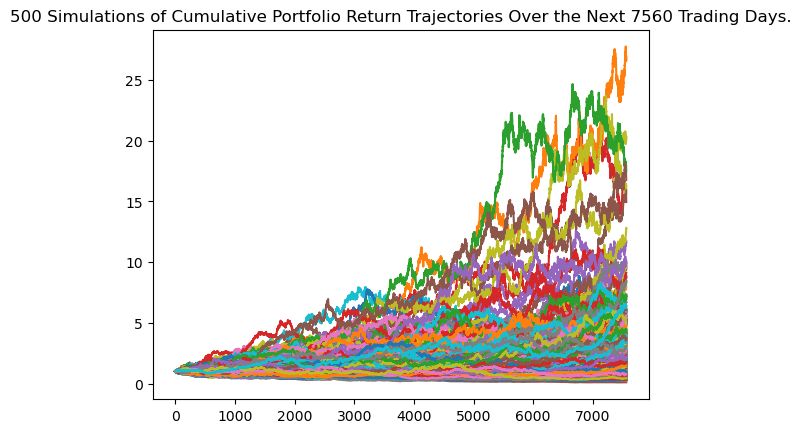

In [112]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
SPY_weight_60_30Y_line_plot = MC_SPY_weight_60_30Y.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

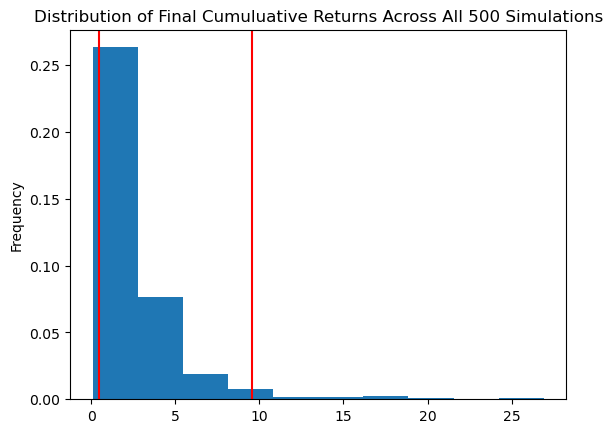

In [113]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
SPY_weight_60_30Y_hist_plot = MC_SPY_weight_60_30Y.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [114]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
SPY_weight_60_30Y_table = MC_SPY_weight_60_30Y.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(SPY_weight_60_30Y_table)

count           500.000000
mean              2.661732
std               2.729472
min               0.101413
25%               1.105458
50%               1.856171
75%               3.274058
max              26.906882
95% CI Lower      0.442600
95% CI Upper      9.571360
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [115]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Current Balance of stock and bond portion of the members portfolio is: {total_stocks_bonds:.2f}')


Current Balance of stock and bond portion of the members portfolio is: 61406.00


In [116]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = SPY_weight_60_30Y_table[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = SPY_weight_60_30Y_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that with the current stock/bond portfolio value of {total_stocks_bonds:.2f},\n"
      f" and a portfolio allocation of 60% SPY and 40% AGG the portfolio over the next 30 years will end within range of"
      f" ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.")


There is a 95% chance that with the current stock/bond portfolio value of 61406.00,
 and a portfolio allocation of 60% SPY and 40% AGG the portfolio over the next 30 years will end within range of $27178.27 and $587738.96.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [117]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_SPY_weight_80_10Y = MCSimulation(
    portfolio_data = prices_df_mc,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_SPY_weight_80_10Y.portfolio_data.head()


AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-12-27 05:00:00+00:00  112.60  112.640  112.5800  112.63  4733786   
2019-12-30 05:00:00+00:00  112.42  112.645  112.3400  112.63  3979209   
2019-12-31 05:00:00+00:00  112.54  112.540  112.3650  112.37  6807706   
2020-01-02 05:00:00+00:00  112.68  112.800  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.050  112.7814  113.01  3664283   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-12-27 05:00:00+00:00       10709  112.615001          NaN  323.74   
2019-12-30 05:00:00+00:00       11922  112.529642     0.000000  322.95   
2019-12-31 05:00:00+00:00       19647  112.410957    -0.002308  320.53   
2020-01-02 05:00:00+00:00       17763  112.645004     0.002759  323.54   
2020-01-03 05:00:00+00:00       14453  112.958798     0.002929  321.16   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2019-12-27 05:00:00+00:00  323.80  322.28  322.85  43669820      187647   
2019-12-30 05:00:00+00:00  323.10  320.55  321.13  49782805      245064   
2019-12-31 05:00:00+00:00  322.13  320.15  321.85  57173534      212945   
2020-01-02 05:00:00+00:00  324.89  322.53  324.87  59253833      304884   
2020-01-03 05:00:00+00:00  323.64  321.10  322.43  77783121      358500   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-12-27 05:00:00+00:00  322.997519          NaN  
2019-12-30 05:00:00+00:00  321.464803    -0.005328  
2019-12-31 05:00:00+00:00  321.379997     0.002242  
2020-01-02 05:00:00+00:00  323.710023     0.009383  
2020-01-03 05:00:00+00:00  322.791701    -0.007511

In [118]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
warnings.filterwarnings("ignore")
MC_SPY_weight_80_10Y.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991956,0.987710,0.979955,1.012923,0.978615,0.997581,1.004555,0.997098,0.990085,1.008684,...,0.996819,0.999742,1.012644,0.985477,1.005573,0.992707,1.011624,1.004938,0.992927,0.997279
2,0.979512,0.994225,0.989451,1.042726,0.977263,0.997584,1.013457,0.995450,0.967852,1.001703,...,0.970297,1.008229,0.996334,0.983085,0.993920,0.994406,0.998196,1.006690,0.984707,1.004877
3,0.965699,0.997592,1.005782,1.051811,0.994954,1.009644,1.014852,0.965509,0.968614,0.996670,...,0.964395,1.005869,1.007425,0.972251,1.003412,0.995642,1.000639,1.014313,0.991123,0.983161
4,0.975237,0.993586,1.005929,1.066365,0.999157,1.022841,1.013493,0.949693,0.976325,0.983950,...,0.973511,0.997368,1.017262,0.986351,1.013777,0.994544,1.013215,1.023949,0.972729,0.971625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.913225,2.449878,0.354703,0.479947,1.157513,1.188543,1.337345,0.815330,1.638693,1.068840,...,3.492210,2.555160,1.794975,2.592823,1.237114,2.847429,0.771340,1.703607,3.962846,1.077043
2517,0.913867,2.477949,0.361915,0.484193,1.183270,1.184349,1.350758,0.829821,1.643473,1.064061,...,3.473723,2.575561,1.807297,2.616122,1.254315,2.850247,0.783955,1.713217,3.965998,1.082843
2518,0.909809,2.443724,0.364326,0.478427,1.169917,1.199189,1.350280,0.827300,1.688727,1.064161,...,3.467274,2.538417,1.804691,2.585972,1.243502,2.835066,0.803340,1.688266,4.034195,1.094575
2519,0.901709,2.469199,0.368957,0.476616,1.163630,1.232381,1.359353,0.822237,1.666278,1.068694,...,3.488353,2.551333,1.823190,2.569902,1.265558,2.831642,0.821018,1.675642,4.045900,1.095627


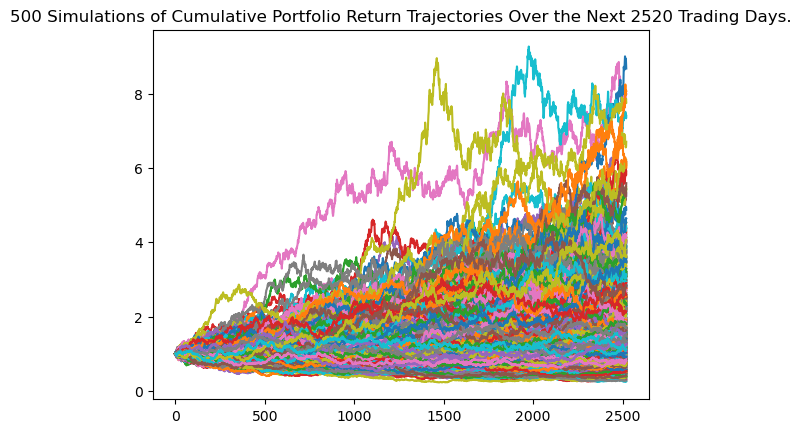

In [119]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
SPY_weight_80_10Y_line_plot = MC_SPY_weight_80_10Y.plot_simulation()


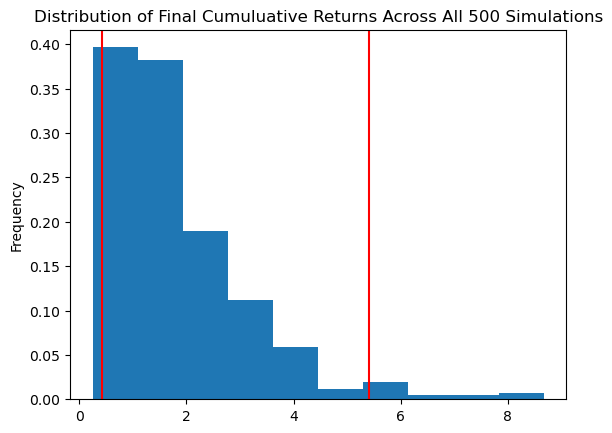

In [120]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
SPY_weight_80_10Y_hist_plot = MC_SPY_weight_80_10Y.plot_distribution()


In [122]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
SPY_weight_80_10Y_table = MC_SPY_weight_80_10Y.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(SPY_weight_80_10Y_table)

count           500.000000
mean              1.857407
std               1.302827
min               0.250725
25%               0.933110
50%               1.493954
75%               2.421705
max               8.674384
95% CI Lower      0.427024
95% CI Upper      5.410128
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [123]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Current Balance of stock and bond portion of the members portfolio is: {total_stocks_bonds:.2f}')


Current Balance of stock and bond portion of the members portfolio is: 61406.00


In [124]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = SPY_weight_80_10Y_table[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = SPY_weight_80_10Y_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that with the current stock/bond portfolio value of {total_stocks_bonds:.2f},\n"
      f" and a portfolio allocation of 80% SPY and 20% AGG the portfolio over the next 10 years will end within range of"
      f" ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")


There is a 95% chance that with the current stock/bond portfolio value of 61406.00,
 and a portfolio allocation of 80% SPY and 20% AGG the portfolio over the next 10 years will end within range of $26221.85 and $332214.33.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?